## Tarea 1: Análisis de datos de Unimorph
- Fecha de entrega: martes 5 de octubre.
- Modalidad: crear la carpeta **tarea-1** en su cuenta de github. 
- La tarea es **individual** pero la **discusión grupal es recomendada.**
- Elija una lengua en [datos](https://github.com/orgs/unimorph/repositories). Elija una lengua distinta a la lengua ejemplo (Yanesha)
- En la carpeta "datos", hay archivos para algunas lenguas. Puede elegir otra :)
- **Recomendación:** implemente de forma ordenada y con comentarios. Trate, en lo posible, de poner comentarios en cada línea.
- No duden en preguntar en caso de cualquier problema!

## Leemos el archivo
Asumimos que la carpeta tarea-1 tiene adentro dos cosas: archivo de datos (de la lengua elegida) en la carpeta "datos", código en formato ipynb (notebook!). A modo de ejemplo, elegimos **Aymara** para explicar los pasos de la tarea. 

In [1]:
## archivo en carpeta "datos"
## aym: Aymara

import pandas as pd

## noten que especificamos la ruta
## aym
datos = pd.read_csv('aym', sep='\t', header=None)
## puede cambiar estos nombres si lo desea
datos.columns = ['lemas','inflexiones','códigos']

In [2]:
## vamos a trabajar solo con verbos!

datos = datos[datos['códigos'].str.startswith('V')]

In [3]:
## nuestros datos!!! Cada fila indica una forma original, una inflexión del verbo y las coordenadas de la inflexión.

datos

,lemas,inflexiones,códigos
0,ñach'a,ñach'iriksma,V;CF;PRS/PST+IMMED;1;SG;AC2
1,ñach'a,ñach'irikta,V;CF;PRS/PST+IMMED;1;SG;AC3
2,ñach'a,ñach'iriksta,V;CF;PRS/PST+IMMED;1;SG;AC3;FORM2
3,ñach'a,ñach'sña,V;CF;PRS/PST+IMMED;1+INCL;AC3
4,ñach'a,ñach'itasma,V;CF;PRS/PST+IMMED;2;SG;AC1
...,...,...,...
334937,yupayucha,yupayuchitayitu,V;PST+RMT;3;SG;AC1
334938,yupayucha,yupayuchataysitu,V;PST+RMT;3;SG;AC1+INCL
334939,yupayucha,yupayuchataytama,V;PST+RMT;3;SG;AC2
334940,yupayucha,yupayuchatayna,V;PST+RMT;3;SG;AC3


### Estos son nuestros datos! 3 listas!

In [4]:
## definamos conjuntos de lemas, inflexiones y códigos para cada lengua :)

#### LEMAS ####
## aym
lemas = list(datos['lemas'])

#### INFLEXIONES ####
## aym
inflexiones = list(datos['inflexiones'])

#### CÓDIGOS ####
## aym
codigos = list(datos['códigos'])

## Preguntas

### 1. ¿Cuántos lemas distintos hay?

In [5]:
## Defina la lista lemas_distintos, que guarda los lemas distintos de la lista lemas

lemas_distintos = []
## use un ciclo for para recorrer la lista lemas. Use una condición if

In [6]:
## medimos el número de elementos que contiene la lista lemas
len(lemas)

119062

In [7]:
## lema es una variable que en cada iteración se reasigna a un elemento de la lista lemas
for lema in lemas:
    ## usamos un if dentro de un ciclo for para ingresar los lemas que no están dentro de la nueva lista: lemas_distintos  
    if lema not in lemas_distintos:
        lemas_distintos+=[lema]

In [8]:
## medimos el número de lemas que contiene la lista lemas_distintos
len(lemas_distintos)

2018

In [9]:
## para comprobar, visualizamos la lista lemas_distintos
lemas_distintos[:10]

["ñach'a",
 'ñaqa',
 'ñatu',
 "ñiq'icha",
 "ñiq'itaki",
 'ñuñkataya',
 'ñuñu',
 'ñuñuthapa',
 'ñuñuya',
 'ñusantaya']

### 2. ¿Cuántas inflexiones hay por lema distinto?

In [10]:
## Calcule la división entre el número de inflexiones y el número de lemas distintos

inflexiones_por_lema_distinto = 0

In [11]:
## medimos el número de elementos que contiene la lista inflexiones
len(inflexiones)

119062

In [12]:
inflexiones_por_lema_distinto = len(inflexiones) / len(lemas_distintos)

In [13]:
## resolvamos la división
inflexiones_por_lema_distinto

59.0

### 3. Defina la lista tokens_codigos, en que cada código está tokenizado por ";"

In [14]:
tokens_codigos = []
## use un ciclo for para recorrer la lista codigos. En cada iteración, use split(';') y guarde el resultado en tokens_codigos

In [15]:
## guardamos los strings tokenizados en la lista tokens_codigos 
for string in codigos:
    ## cortamos por ";" para dividir entre espacios en blanco
    tokens_codigos+=[string.split(';')]

In [16]:
## para comprobar, visualizamos la lista tokens_codigos
tokens_codigos[:10]

[['V', 'CF', 'PRS/PST+IMMED', '1', 'SG', 'AC2'],
 ['V', 'CF', 'PRS/PST+IMMED', '1', 'SG', 'AC3'],
 ['V', 'CF', 'PRS/PST+IMMED', '1', 'SG', 'AC3', 'FORM2'],
 ['V', 'CF', 'PRS/PST+IMMED', '1+INCL', 'AC3'],
 ['V', 'CF', 'PRS/PST+IMMED', '2', 'SG', 'AC1'],
 ['V', 'CF', 'PRS/PST+IMMED', '2', 'SG', 'AC3'],
 ['V', 'CF', 'PRS/PST+IMMED', '3', 'SG', 'AC1'],
 ['V', 'CF', 'PRS/PST+IMMED', '3', 'SG', 'AC1+INCL'],
 ['V', 'CF', 'PRS/PST+IMMED', '3', 'SG', 'AC2'],
 ['V', 'CF', 'PRS/PST+IMMED', '3', 'SG', 'AC3']]

### 4. ¿Cuál es el número promedio de símbolos usados para describir las inflexiones?

In [17]:
numero_inflexiones = 0

## recorra la lista tokens_codigos con un ciclo for. En cada iteración, guarde el largo de la sublista en numero_inflexiones.
## Finalmente, divida el largo de la lista numero_inflexiones por el número de la lista tokens_codigos!

In [18]:
## Antes de ejecutar un ciclo for a la lista tokens_codigos, creamos la lista numero_inflexiones con valor cero para guardar el largo de las inflexiones

for item in tokens_codigos:
    N = len(item)
    numero_inflexiones += N

In [19]:
## medimos el número de inflexiones
numero_inflexiones

623562

In [20]:
## medimos el largo de la lista tokens_codigos
len(tokens_codigos)

119062

In [21]:
## Finalmente, creamos la lista promedio_inflexiones con valor cero para que guarde el promedio de inflexiones 

promedio_inflexiones = 0

promedio_inflexiones = numero_inflexiones / len(tokens_codigos)

In [22]:
## calculamos la división que nos indica el promedio de códigos que corresponden a cada inflexión
promedio_inflexiones

5.237288135593221

### 5. Ahora, tokens_codigos es una lista de listas. Defina la lista lista_codigos, que guarda todos los strings usados para describir las inflexiones

In [23]:
lista_codigos = []
## use un ciclo for para recorrer la lista tokens_codigos. En cada iteración, use otro ciclo for, que recorra la sublista, y 
## guarde los strings en lista_codigos

## para resolver este problema, necesito iterar con un ciclo for sobre los elementos de tokens_codigos. Como cada elemento
## es también una lista, podemos recorrerlo con otro ciclo for. 

In [24]:
## recorremos con un ciclo for las sublistas de tokens_codigos
for sub_lista in tokens_codigos:
    ## el segundo ciclo for recorre los items dentro de sub_lista
    for item in sub_lista:
        lista_codigos+=[item]       

In [25]:
## para comprobar, visualizamos los elementos de lista_codigos
lista_codigos[:10]

['V', 'CF', 'PRS/PST+IMMED', '1', 'SG', 'AC2', 'V', 'CF', 'PRS/PST+IMMED', '1']

### 6. ¿Cuántos símbolos se utilizan para definir las inflexiones?

In [26]:
## Defina la lista simbolos_distintos, que guarda los simbolos distintos de lista_codigos

simbolos_distintos = []
## use un ciclo for para recorrer la lista lista_codigos. 

In [27]:
for simbolo in lista_codigos:
    ## usamos un if dentro de un ciclo for para ingresar los símbolos que no están dentro de la nueva lista: simbolos_distintos  
    if simbolo not in simbolos_distintos:
        simbolos_distintos+=[simbolo]

In [28]:
## para comprobar, visualizamos los elementos de la lista simbolos_distintos
simbolos_distintos

['V',
 'CF',
 'PRS/PST+IMMED',
 '1',
 'SG',
 'AC2',
 'AC3',
 'FORM2',
 '1+INCL',
 '2',
 'AC1',
 '3',
 'AC1+INCL',
 'PST',
 'FUT',
 'IMP',
 'PST+RCT',
 'PST+RMT',
 'V.MSDR']

### 7. Construya la lista triple_datos en donde cada elemento tiene la forma [lema,inflexión,código]

In [29]:
triple_datos = []

## recorra las listas usando los índices!

In [30]:
## recorremos los índices de las tres listas tomando en cuenta que cada lista tiene el mismo largo
for i in range(len(lemas)):
    ## integramos los elementos en la lista triple_datos y agregamos un espacio 
    integracion = lemas[i]+" "+inflexiones[i]+" "+codigos[i]
    S = integracion.split ()
    triple_datos+=[S]

In [31]:
## para comprobar, visualizamos los elementos de la lista triple_datos
triple_datos[:10]

[["ñach'a", "ñach'iriksma", 'V;CF;PRS/PST+IMMED;1;SG;AC2'],
 ["ñach'a", "ñach'irikta", 'V;CF;PRS/PST+IMMED;1;SG;AC3'],
 ["ñach'a", "ñach'iriksta", 'V;CF;PRS/PST+IMMED;1;SG;AC3;FORM2'],
 ["ñach'a", "ñach'sña", 'V;CF;PRS/PST+IMMED;1+INCL;AC3'],
 ["ñach'a", "ñach'itasma", 'V;CF;PRS/PST+IMMED;2;SG;AC1'],
 ["ñach'a", "ñach'asma", 'V;CF;PRS/PST+IMMED;2;SG;AC3'],
 ["ñach'a", "ñach'itaspa", 'V;CF;PRS/PST+IMMED;3;SG;AC1'],
 ["ñach'a", "ñach'asitaspha", 'V;CF;PRS/PST+IMMED;3;SG;AC1+INCL'],
 ["ñach'a", "ñach'iriktam", 'V;CF;PRS/PST+IMMED;3;SG;AC2'],
 ["ñach'a", "ñach'irki", 'V;CF;PRS/PST+IMMED;3;SG;AC3']]

### 8. ¿Existen códigos para los cuales el lema es igual a su inflexión? Defina la lista lema_igual_inflexion, que en cada posición pone 1 si son iguales, o 0 en otro caso.

In [32]:
lema_igual_inflexion = []

## recorra la lista triple_datos. En cada interación, use una condición if.

## usamos un ciclo for para recorrer las sublistas dentro de la lista triple_datos
for elementos in triple_datos:
    ## usamos otro ciclo for para recorrer los items dentro sublistas
    for item in range(len(elementos)):
        ## empleamos una condición if que compare los items de los lemas e inflexiones 
        ## donde se indique 1 cuando son iguales y 0 en otros casos
        if elementos[0] == elementos[1]:
            lema_igual_inflexion += "1"
        else:
            lema_igual_inflexion += "0"

In [33]:
## Visualizamos la nueva lista que nos muestra los casos en los que el lema y su inflexión coinciden (1), y en los que no (0).
lema_igual_inflexion[:20]

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

### 9. Usemos una librería!

In [34]:
!pip install jellyfish

In [35]:
## la distancia de hamming permite calcular la distancia entre strings. Un alto valor de la distancia de Hamming implica que los
## strings son distintos

import jellyfish as JF

JF.hamming_distance("a'chenkateñets","a'chenkateñet")

1

In [36]:
## a partir de la lista triple_datos, construya la lista distancia_largo_codigos, en que cada elemento tiene la forma [JF.hamming_distance(codigo,inflexión),largo(codigo)]

distancia_largo_codigos = []

item = ['achenkateñets','achenkateñets','V;NFIN']

distancia_largo_codigos = [[3,8],[0,6]]

In [37]:
## usamos un ciclo for para recorrer las sublistas dentro de la lista triple_datos
for sublista in triple_datos:
    ## usamos otro ciclo for para recorrer los items dentro sublistas
    for item in range(len(sublista)):
        ## usamos la función de distancia hamming e introducimos los datos en la lista distancia_largo_codigos
        medicion = JF.hamming_distance(sublista[0],sublista[1]),len(sublista[0])
        distancia_largo_codigos+=[medicion]

In [38]:
## Visualizamos las medidas de Hamming aplicadas al lema y inflexión.
distancia_largo_codigos[:10]

[[3, 8],
 [0, 6],
 (7, 6),
 (7, 6),
 (7, 6),
 (6, 6),
 (6, 6),
 (6, 6),
 (7, 6),
 (7, 6)]

### 10. Extraiga dos listas de distancia_largo_codigos: distancias y largo_codigos, que guardan las distancias entre lemas e inflexiones, y el largo de los códigos

In [39]:
distancias = []
largo_codigos = []

In [40]:
for sublista in distancia_largo_codigos:
    distancias += [sublista[0]]
    largo_codigos += [sublista[1]]

In [41]:
distancias[:10]

[3, 0, 7, 7, 7, 6, 6, 6, 7, 7]

In [42]:
largo_codigos[:10]

[8, 6, 6, 6, 6, 6, 6, 6, 6, 6]

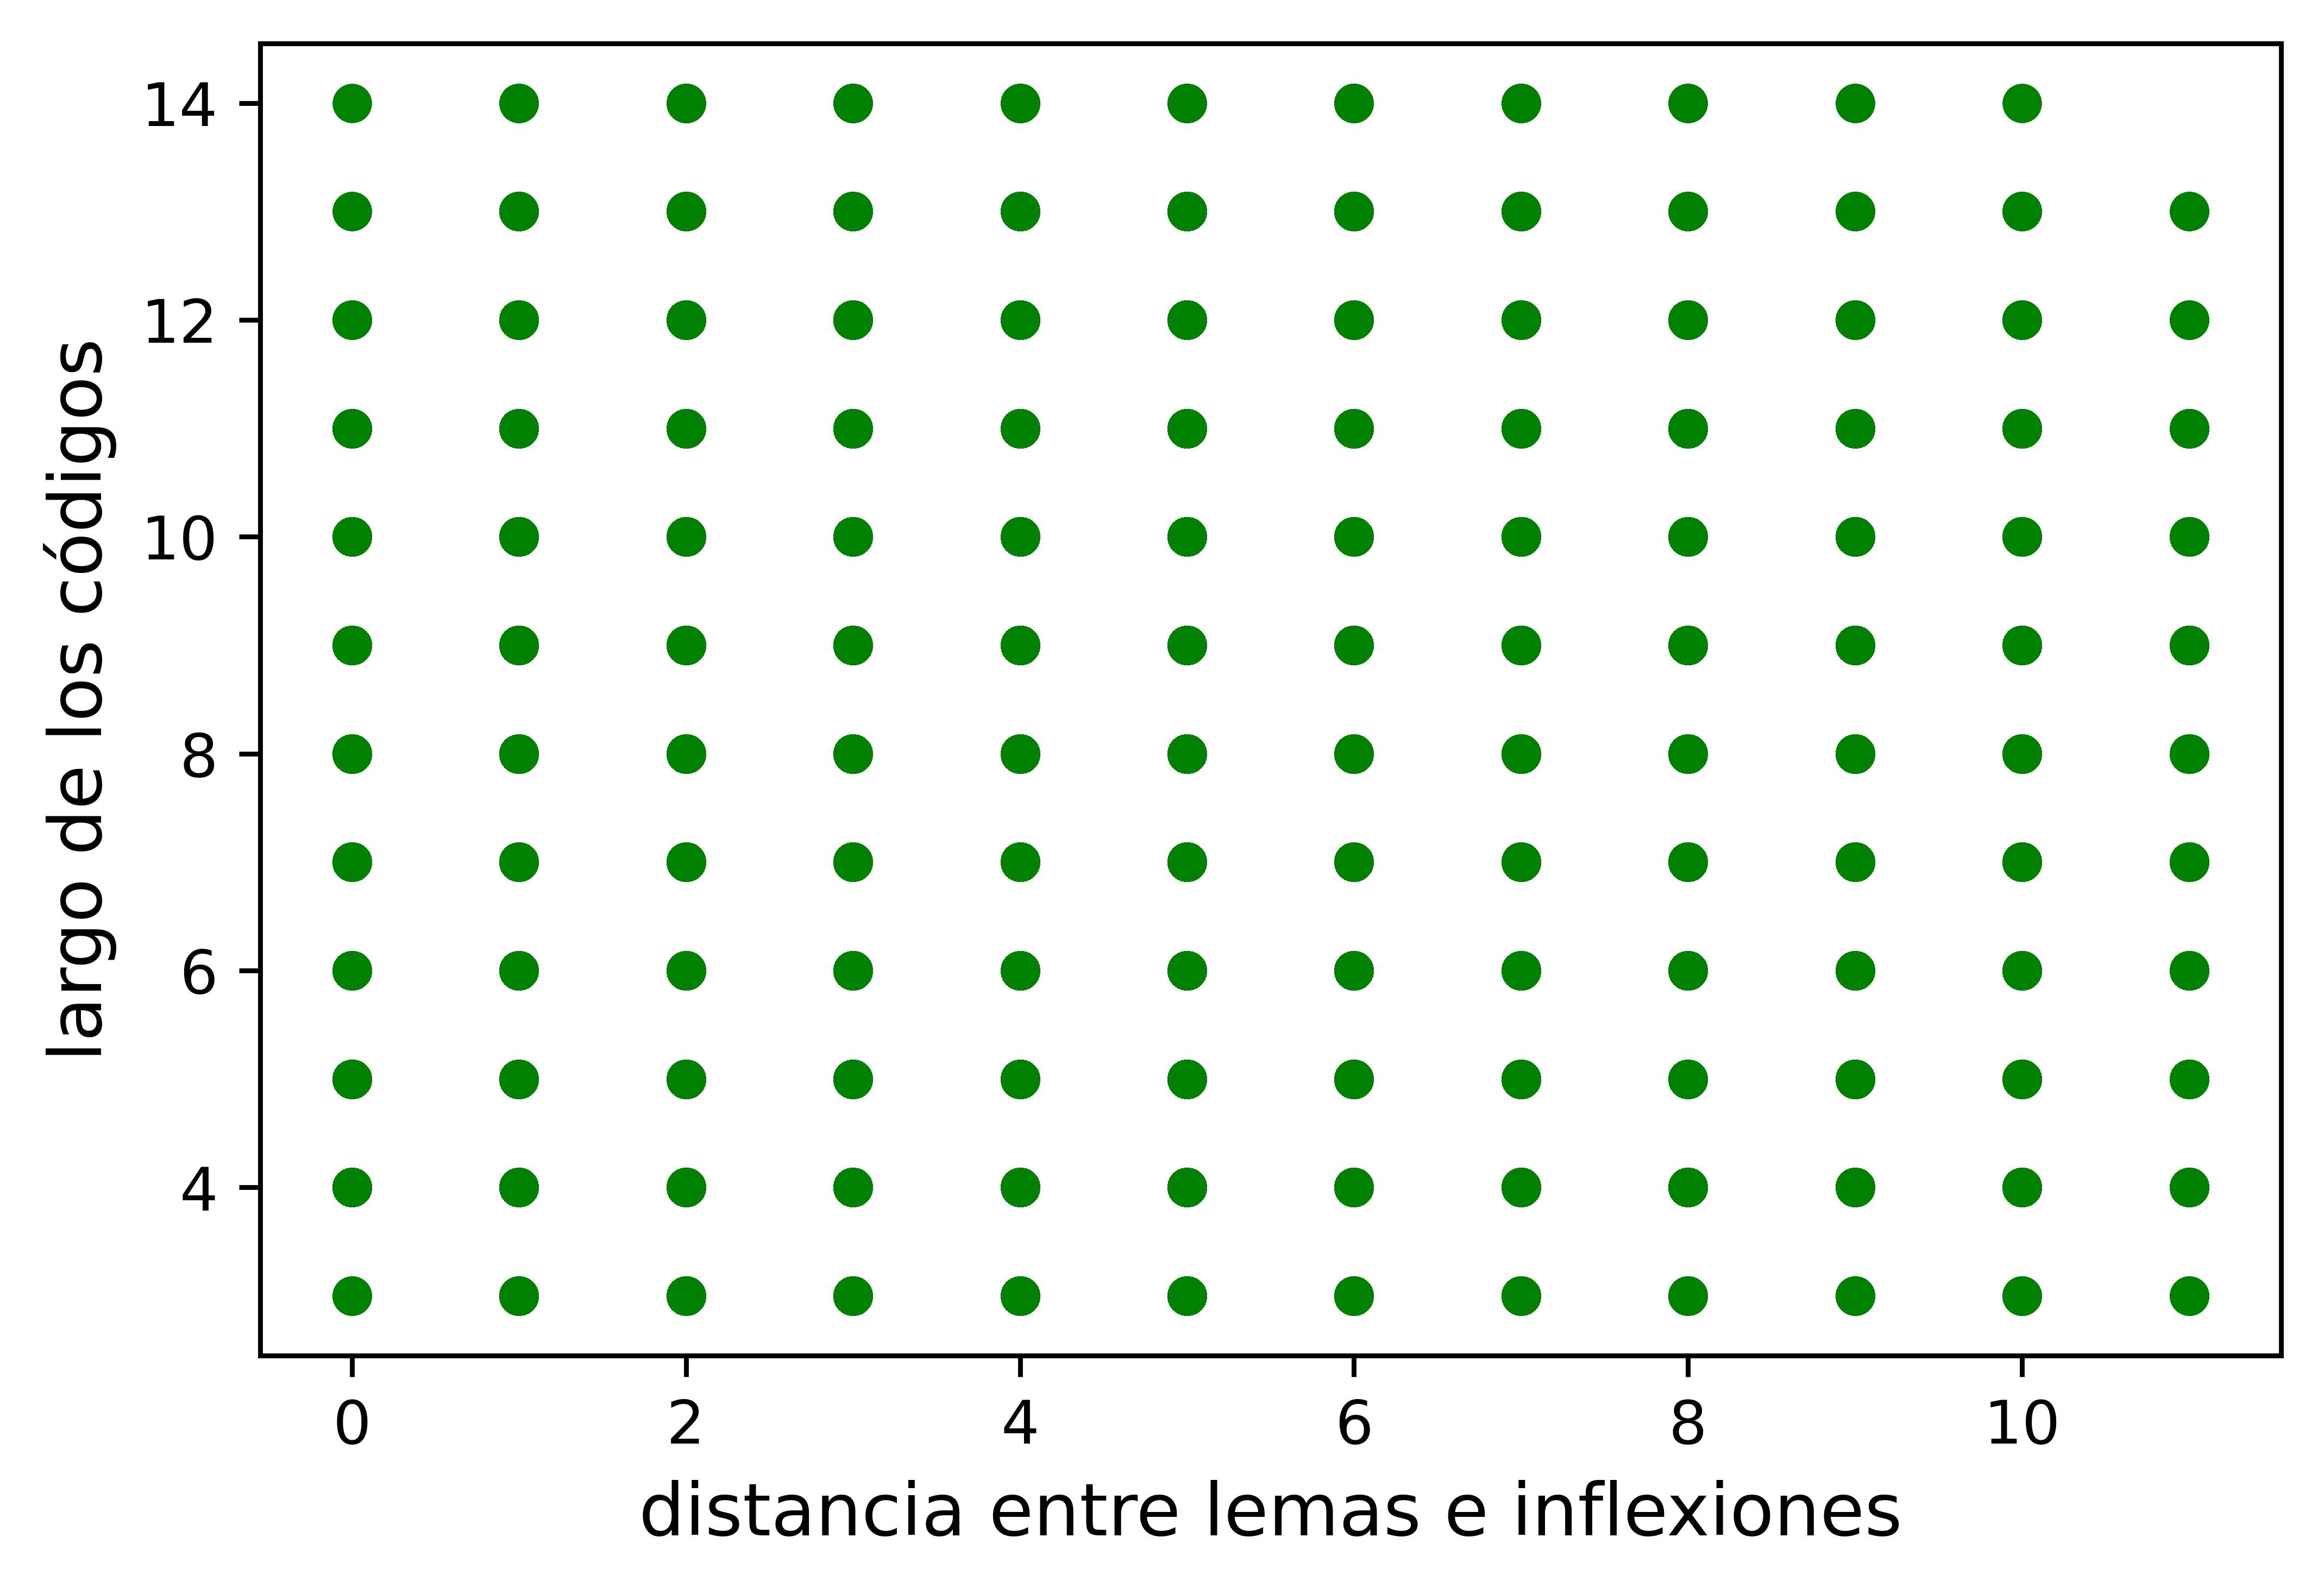

In [43]:
## ejecute el siguiente código!

import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)
    
ax.plot(distancias,largo_codigos,linewidth=0,marker='o',color='green',markersize=6,markeredgewidth=0.5,markeredgecolor='g',alpha=0.75,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best')
plt.ylabel('largo de los códigos',fontsize=12)
plt.xlabel('distancia entre lemas e inflexiones',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('distanciavslargo.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### 11. Responda las siguientes preguntas. 
- ¿A partir de los cálculos realizados, qué podemos decir sobre la tipología morfológica de la lengua estudiada? Use en su respuesta algo de los cálculos realizados en relación a inflexiones y lemas. Puede explicar los calculos propuestos de manera informal.
- ¿Qué otros cálculos podrían hacerse?